## 1. Возьмем датасет отзывов о фильмах IMDb, который содержит текстовые рецензии с бинарной разметкой настроения (позитивный/негативный).

In [33]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [34]:
import pandas as pd
data = pd.read_csv('sentiment_dataset_work.csv')

In [35]:
data.head()

,review,sentiment,rule_based_sentiment
0,after having read two or three negative review...,1,-1
1,in a lonely road in cape girardeau missouri a ...,1,-1
2,of the many problems with this film the worst ...,0,0
3,jeremy irons and forrest whitaker are good act...,0,-1
4,by 1945 and after a string of solid wwii propa...,1,0


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   review                3000 non-null   object
 1   sentiment             3000 non-null   int64 
 2   rule_based_sentiment  3000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 70.4+ KB


## 2. Выполним разметку на основе правил (rule-based labeling) на подмножестве выбранного датасета. Разработаем и реализуем набор правил или условий, которые позволят автоматически присваивать метки данным на основе определенных шаблонов или критериев.

In [37]:
def rule_based_labeling(row):
    review = str(row['review'])  # Преобразуем в строку
    
    positive_words = [
        'great', 'awesome', 'amazing', 'excellent', 
        'wonderful', 'best', 'love', 'enjoyed', 
        'fantastic', 'brilliant', 'perfect'
    ]
    
    negative_words = [
        'terrible', 'awful', 'bad', 'worst', 
        'horrible', 'disappointing', 'boring', 
        'hate', 'poor', 'stupid'
    ]
    
    if any(word in review.lower() for word in positive_words):
        return 'positive'
    elif any(word in review.lower() for word in negative_words): 
        return 'negative'
    else:
        return 'neutral'

In [38]:
data["Rating label"] = data.apply(rule_based_labeling, axis=1)

In [39]:
data.head()

,review,sentiment,rule_based_sentiment,Rating label
0,after having read two or three negative review...,1,-1,positive
1,in a lonely road in cape girardeau missouri a ...,1,-1,positive
2,of the many problems with this film the worst ...,0,0,positive
3,jeremy irons and forrest whitaker are good act...,0,-1,positive
4,by 1945 and after a string of solid wwii propa...,1,0,negative


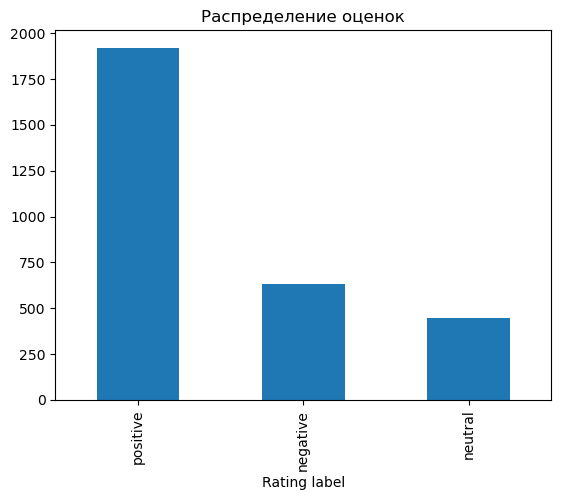

In [40]:
import matplotlib.pyplot as plt

data["Rating label"].value_counts().plot(kind="bar")
plt.title("Распределение оценок")
plt.show()

## 3. Выполним разметку вручную отдельного подмножества выбранного датасета с помощью инструмента разметки Labelstudio.

In [41]:
# Формируем выборку для ручной разметки и сохраняем ее в файл .csv
manual_labeling_subset = data[['review', 'sentiment', 'rule_based_sentiment', 'Rating label']].sample(frac=0.01)
manual_labeling_subset.to_csv('project-9_work.csv', index=False)

Скачиваем Label Studio:
`pip install label-studio`

Запускаем сервер:
`label-studio start`

Загружаем файл 'project-9_work.csv' для разметки в формате CSV.

Настраивам метки и делаем разметку вручную.

Сохраняем файл с выполненными разметками.

In [42]:
manual_labels = pd.read_csv('project-9_work.csv')
manual_labels.head()

,annotation_id,annotator,created_at,id,lead_time,review,rule_based_sentiment,sentiment,updated_at
0,1,1,2024-12-04T21:02:55.191339Z,1,71.923,after having read two or three negative review...,-1,1,2024-12-04T21:02:55.191339Z
1,3,1,2024-12-04T21:05:55.739737Z,2,2.584,in a lonely road in cape girardeau missouri a ...,-1,1,2024-12-04T21:05:55.739737Z
2,2,1,2024-12-04T21:05:00.558915Z,3,6.768,of the many problems with this film the worst ...,0,0,2024-12-04T21:05:00.558915Z
3,4,1,2024-12-04T21:06:44.863892Z,4,2.984,jeremy irons and forrest whitaker are good act...,-1,0,2024-12-04T21:06:44.863892Z
4,5,1,2024-12-04T21:07:42.653414Z,5,3.952,by 1945 and after a string of solid wwii propa...,0,1,2024-12-04T21:07:42.653414Z


## 4. Объединим данные, размеченные вручную, с данными, размеченными на основе правил. Объединим два подмножества размеченных данных в один набор данных, сохранив при этом соответствующую структуру и целостность.

In [43]:
# Объединяем данные по столбцу 'review'
merged_data = data.merge(manual_labels[['review', 'sentiment']], on='review', how='left', suffixes=('_auto', '_manual'))

# Переименовываем столбцы для ясности
merged_data.rename(columns={
    'sentiment': 'manual_sentiment',
    'rule_based_sentiment': 'auto_sentiment'
}, inplace=True)

# Сохраняем объединенные данные в новый CSV файл
merged_data.to_csv('merged_data.csv', index=False)

# Выводим первые несколько строк объединенного DataFrame для проверки
print(merged_data.head())

                                              review  sentiment_auto  \
0  after having read two or three negative review...               1   
1  in a lonely road in cape girardeau missouri a ...               1   
2  of the many problems with this film the worst ...               0   
3  jeremy irons and forrest whitaker are good act...               0   
4  by 1945 and after a string of solid wwii propa...               1   

   auto_sentiment Rating label  sentiment_manual  
0              -1     positive               1.0  
1              -1     positive               1.0  
2               0     positive               0.0  
3              -1     positive               0.0  
4               0     negative               1.0  


## 5. Обучим модель машинного обучения, используя объединенный набор размеченных данных. Разделим датасет на обучающий и тестовый наборы и используем обучающий набор для обучения модели.

In [46]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, balanced_accuracy_score, cohen_kappa_score
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

# Загрузка объединенного набора данных
data = pd.read_csv('merged_data.csv') 

# Функция расширенной предобработки
def advanced_preprocessing(data):
    # Удаление дубликатов
    data = data.drop_duplicates()
    
    # Фильтрация коротких текстов
    data = data[data['review'].str.len() > 10]
    
    # Анализ распределения классов
    class_counts = data['Rating label'].value_counts()
    print("Распределение классов до предобработки:")
    print(class_counts)
    
    # Балансировка классов
    minority_classes = class_counts[class_counts < class_counts.mean()].index
    
    balanced_data = data.copy()
    for cls in minority_classes:
        minority_samples = data[data['Rating label'] == cls]
        majority_samples = data[data['Rating label'] != cls]
        
        oversampled = resample(
            minority_samples, 
            replace=True, 
            n_samples=int(len(majority_samples) * 0.3),  # Пропорциональное увеличение
            random_state=42
        )
        
        balanced_data = pd.concat([balanced_data, oversampled])
    
    # Повторный анализ распределения
    class_counts_after = balanced_data['Rating label'].value_counts()
    print("\nРаспределение классов после предобработки:")
    print(class_counts_after)
    
    return balanced_data

# Применение расширенной предобработки
data = advanced_preprocessing(data)

# Подготовка признаков и меток
X = data['review'] 
y = data['Rating label']

# Обработка пропущенных значений
X = X.fillna('') 
y = y.fillna(0) 

# Преобразование всех значений в строковый формат
X = X.astype(str)

# Удаление пустых строк
X = X[X.str.strip() != '']

# Расширенная векторизация
vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=10000,
    ngram_range=(1, 3),  # Триграммы для контекста
    max_df=0.9,  # Игнорировать слишком частые термины
    min_df=3     # Минимальная частота слова
)
X_vectorized = vectorizer.fit_transform(X)

# Разделение набора данных на обучающий и тестовый
X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized, y, 
    test_size=0.3, 
    stratify=y,  # Стратифицированное разделение
    random_state=42
)

# Применение SMOTE для дополнительной балансировки
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Настройка весов классов
class_weights = {
    cls: 1 / count for cls, count in dict(pd.Series(y_train_resampled).value_counts()).items()
}

# Выбор и обучение модели с расширенной конфигурацией
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=10,
    class_weight=class_weights,
    random_state=42
)  
model.fit(X_train_resampled, y_train_resampled)

Распределение классов до предобработки:
Rating label
positive    1920
negative     633
neutral      447
Name: count, dtype: int64

Распределение классов после предобработки:
Rating label
positive    1920
negative    1343
neutral     1212
Name: count, dtype: int64


RandomForestClassifier(class_weight={'negative': 0.000744047619047619,
                                     'neutral': 0.000744047619047619,
                                     'positive': 0.000744047619047619},
                       max_depth=15, min_samples_split=10, n_estimators=200,
                       random_state=42)

## 6. Оценим эффективность обученной модели на тестовом датасете. Используем подходящие метрики оценки. Интерпретируем результаты и проанализируем эффективность модели в решении задачи разметки.

In [47]:
# Предсказание и оценка
y_pred = model.predict(X_test)

# Расширенная оценка модели
print("\nОсновные метрики:")
print("Точность:", accuracy_score(y_test, y_pred))
print("Сбалансированная точность:", balanced_accuracy_score(y_test, y_pred))
print("Каппа-статистика:", cohen_kappa_score(y_test, y_pred))

print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred, zero_division=0))

print("\nМатрица ошибок:")
print(confusion_matrix(y_test, y_pred))

# Анализ важности признаков
feature_importances = model.feature_importances_
top_features_indices = np.argsort(feature_importances)[-10:]
top_features_names = vectorizer.get_feature_names_out()[top_features_indices]

print("\nТоп-10 важных признаков:")
for name, importance in zip(top_features_names, feature_importances[top_features_indices]):
    print(f"{name}: {importance}")


Основные метрики:
Точность: 0.896500372300819
Сбалансированная точность: 0.9092686547323644
Каппа-статистика: 0.8439634326256074

Отчет о классификации:
              precision    recall  f1-score   support

    negative       0.87      0.91      0.89       403
     neutral       0.82      0.99      0.90       364
    positive       0.99      0.83      0.90       576

    accuracy                           0.90      1343
   macro avg       0.89      0.91      0.90      1343
weighted avg       0.91      0.90      0.90      1343


Матрица ошибок:
[[367  34   2]
 [  2 360   2]
 [ 53  46 477]]

Топ-10 важных признаков:
poor: 0.013399197577385145
boring: 0.014185136639466425
wonderful: 0.01622509559214146
awful: 0.016410863054709658
excellent: 0.018438511780600627
love: 0.02341424615694228
worst: 0.024551573049968106
bad: 0.034074014258277496
best: 0.03929839191949464
great: 0.051119404633046914


### Вывод

Мы получили высокую точность предсказания почти 90%. Это очень хороший результат.
Класс negative предсказан с точность 87%. Класс neutral предсказан с точность 82%. Класс positive предсказан с точность 99%. 
Нейтральный класс имеет максимальную полноту. 
Позитивный классимеет самую высокую точность. 
Негативный класс демонстрирует сбалансированность метр.

- Модель показывает высокое качество предсказания для всех классов.
- Наиболее надежно распознаются нейтральные и позитивные тексты.
- Минимальное количество ложных срабатываний.
- Устойчивость к различным тональным контекстам.иксть.
